In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
from bert_model import BERTClassifier, get_df, load_bert_model, load_metrics

c:\Users\bchen\anaconda3\envs\cs439\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = get_df()

Connection successful!


In [ ]:
# loaded_model = load_bert_model('../final_aita_model.pth')
metrics = load_metrics('../model_metrics.json')

Class Distribution plot

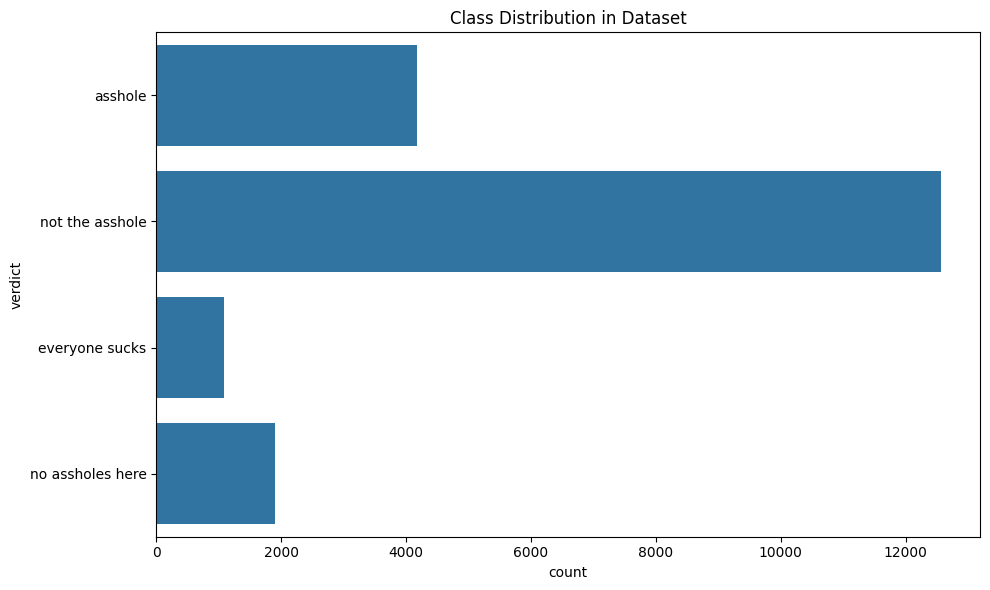

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(y='verdict', data=df)
plt.title('Class Distribution in Dataset')
plt.tight_layout()
plt.show()

Text length analysis

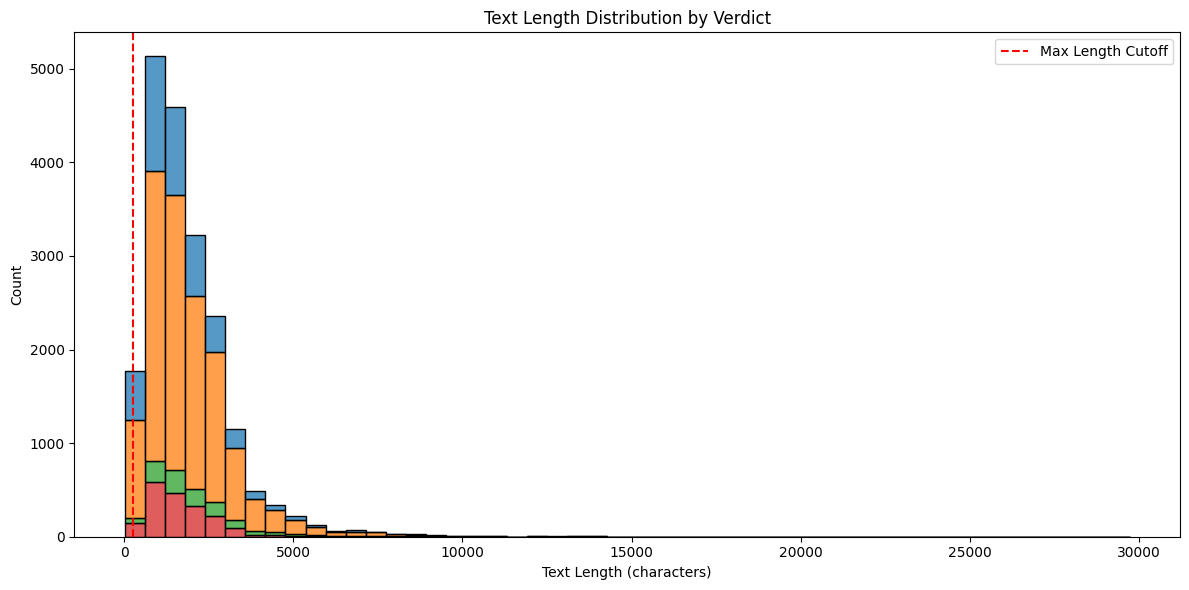

In [4]:
df['text_length'] = df['combined_text'].str.len()
    
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='verdict', bins=50, multiple='stack')
plt.title('Text Length Distribution by Verdict')
plt.xlabel('Text Length (characters)')
plt.axvline(256, color='red', linestyle='--', label='Max Length Cutoff')
plt.legend()
plt.tight_layout()
plt.show()

Plot Training Metrics

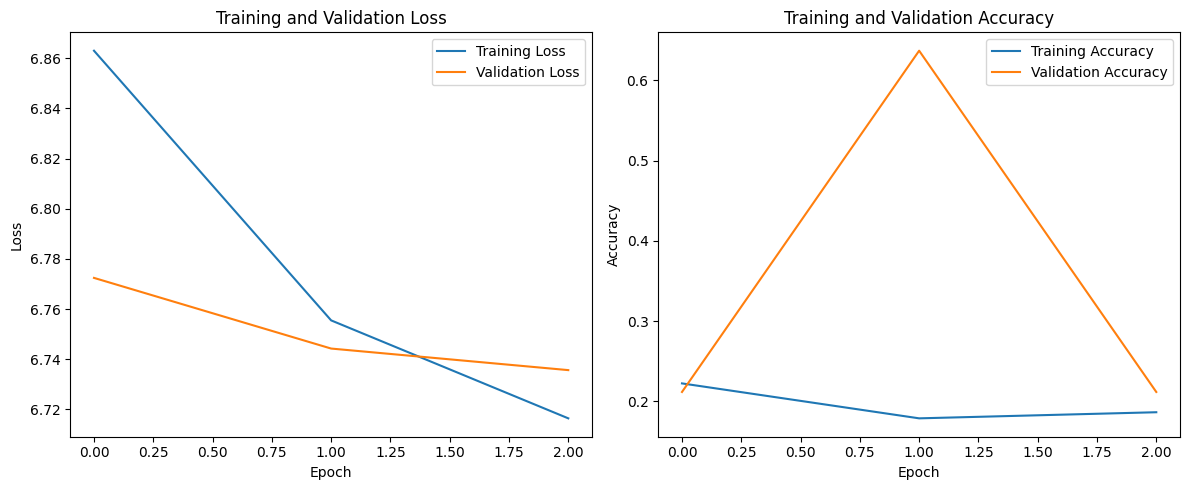

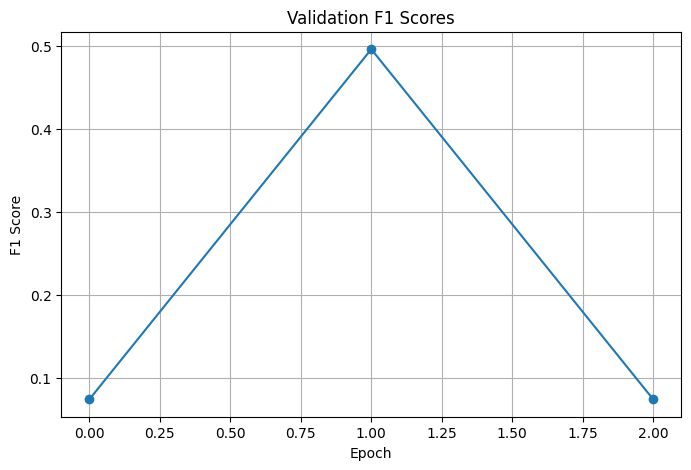

In [ ]:
training_metrics = metrics['training_metrics']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(metrics['step_metrics']['steps'], metrics['step_metrics']['losses'])
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss per Training Step')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(metrics['step_metrics']['steps'], metrics['step_metrics']['accuracies'])
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy per Training Step')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(8, 5))
plt.plot(training_metrics['val_f1_scores'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Scores')
plt.grid(True)
plt.show()